Income Range Predictor

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import metrics
from scipy import stats


In [58]:
data = pd.read_csv('E:\VSCode_workshop\python_workshop\IncomeRangePredictor\dataScienceProject\\adult.csv')
data.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [59]:
data.shape

(48842, 15)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [61]:
data.duplicated().sum()

52

In [62]:
data.drop_duplicates()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [63]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Dropped as more than 75% is 0

In [64]:
data = data.drop(['capital-gain', 'capital-loss'], axis=1)

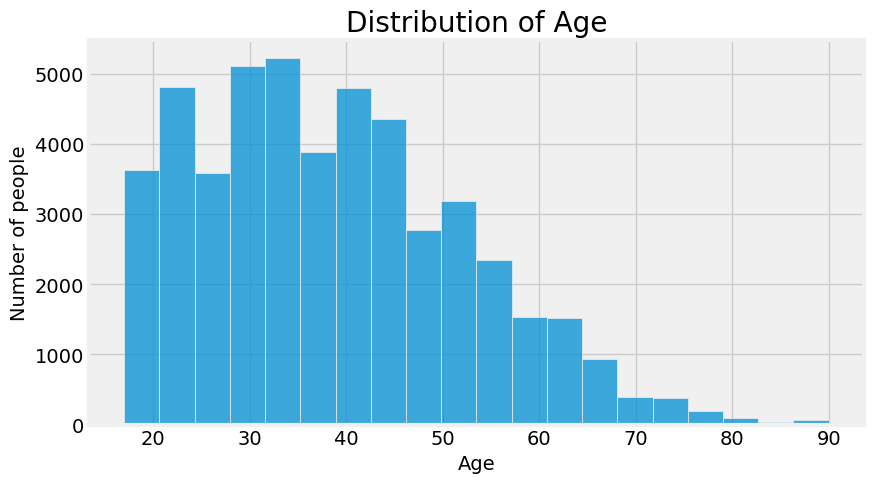

In [65]:
age = data['age'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.histplot(data['age'], bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.show()

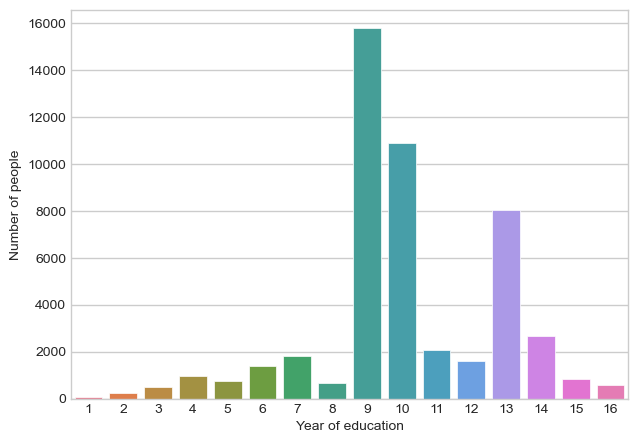

In [66]:
edu_num= data['educational-num'].value_counts()
plt.style.use('ggplot')
sns.set_style("whitegrid")
sns.barplot(x=edu_num.index, y= edu_num.values, palette='husl');
plt.xlabel('Year of education');
plt.ylabel('Number of people');

In [67]:
data["occupation"].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [68]:
data["workclass"].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

Skewed: Therefore using median instead of mean

In [69]:
data.replace('?', np.nan, inplace=True)

for column in data.columns:
    if data[column].isnull().sum() > 0:
        if data[column].dtype == 'object':
            # Replace missing values with mode
            mode = data[column].mode()[0]
            data[column].fillna(mode, inplace=True)
        else:
            # Replace missing values with mean
            median = data[column].median()
            data[column].fillna(median, inplace=True)

data


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [71]:
# Race
race_counts = data['race'].value_counts()
race_percentages = race_counts / len(data) * 100
print("Race Distribution:")
print(race_percentages)

# Gender
gender_counts = data['gender'].value_counts()
gender_percentages = gender_counts / len(data) * 100
print("\nGender Distribution:")
print(gender_percentages)

# Native Country
country_counts = data['native-country'].value_counts()
country_percentages = country_counts / len(data) * 100
print("\nNative Country Distribution:")
print(country_percentages)


Race Distribution:
White                 85.504279
Black                  9.592154
Asian-Pac-Islander     3.110028
Amer-Indian-Eskimo     0.962287
Other                  0.831252
Name: race, dtype: float64

Gender Distribution:
Male      66.848204
Female    33.151796
Name: gender, dtype: float64

Native Country Distribution:
United-States                 91.497072
Mexico                         1.947095
Philippines                    0.603988
Germany                        0.421768
Puerto-Rico                    0.376725
Canada                         0.372630
El-Salvador                    0.317350
India                          0.309160
Cuba                           0.282544
England                        0.260022
China                          0.249785
South                          0.235453
Jamaica                        0.217026
Italy                          0.214979
Dominican-Republic             0.210884
Japan                          0.188362
Guatemala                      0.

In [72]:
threshold = 0.1
total_count = len(data)
count_threshold = total_count * threshold
country_distribution = data['native-country'].value_counts() / total_count
rare_categories = country_distribution[country_distribution < threshold].index.tolist()
data['native-country'] = data['native-country'].apply(lambda x: 'Other' if x in rare_categories else x)

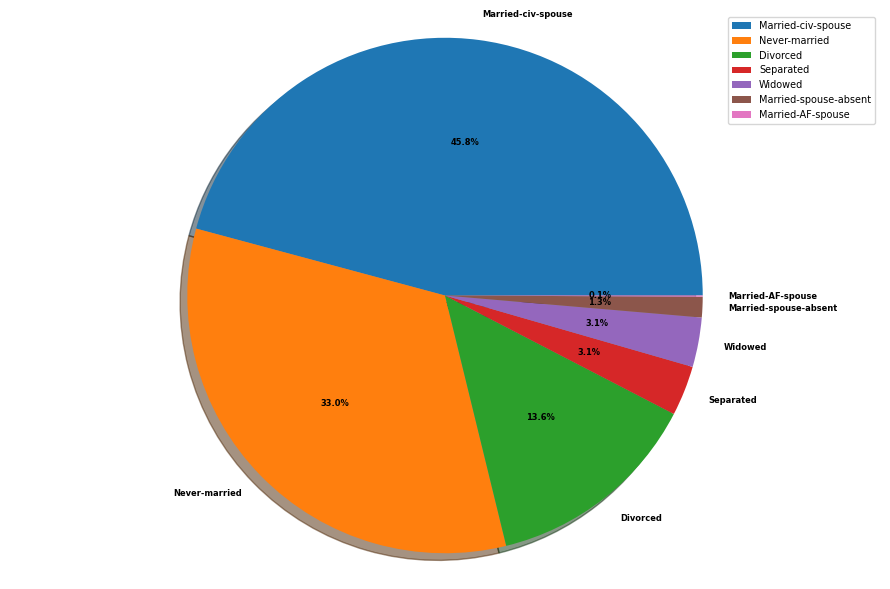

In [73]:
marial_status = data['marital-status'].value_counts()
plt.figure(figsize=(10, 7))

plt.style.use('default')
plt.pie(marial_status,labels=marial_status.index,autopct='%1.1f%%',shadow=True,textprops = {'fontsize': 6,'weight': 'bold'})
plt.legend(loc="center left")
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

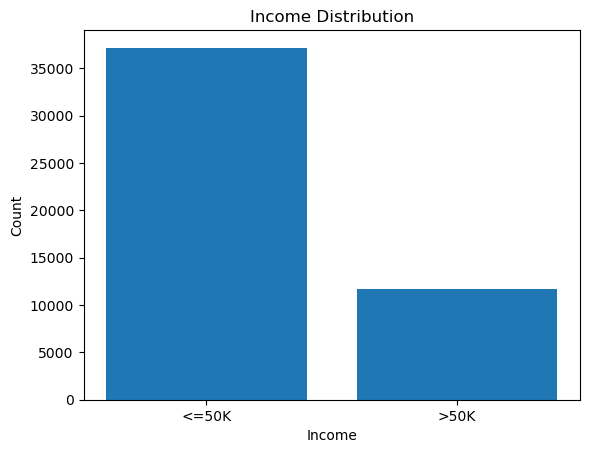

In [74]:
# Visualize income distribution
plt.bar(data['income'].unique(), data['income'].value_counts())
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Distribution')
plt.show()

In [54]:
object_columns = data.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for col in object_columns:
    data[col] = label_encoder.fit_transform(data[col])

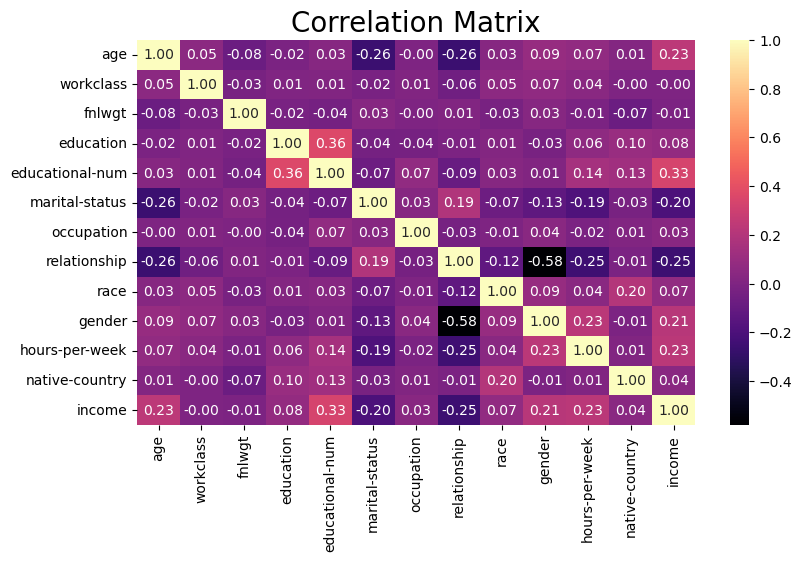

In [21]:
f, ax = plt.subplots(figsize=[9, 5])
sns.heatmap(data.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [22]:
# Separate features (X) and target variable (y)
X = data.drop(['income'], axis=1)
y = data['income']


In [23]:
# Compute weights based on 'fnlwgt'
weights_fnlwgt = X['fnlwgt'] / X['fnlwgt'].sum()

weights_combined = pd.DataFrame(weights_fnlwgt, columns=['weights'])

In [24]:
from imblearn.over_sampling import SMOTE

We will use the random forest classifier because most of the data are 0 and 1, the dataset contains binary or categorical variables where most of the values are either 0 or 1.

Random Forest is a versatile algorithm that can handle both numerical and categorical data effectively. In the context of my binary classification problem, Random Forest is a good choice for several reasons:

Handling Imbalanced Data:
Random Forest Classifier handles class imbalance well without the need for explicit balancing techniques. Its inherent randomness in feature selection and bootstrapping can help mitigate the effects of imbalanced classes.

Non-linearity:
Random Forest can capture complex nonlinear relationships between features and the target variable. This flexibility is valuable when the relationship between predictors and the target is not linear, which is often the case in real-world datasets.

Robustness to Irrelevant Features:
Random Forests are robust to irrelevant features and noise in the data. They can handle datasets with a mix of relevant and irrelevant predictors without overfitting.

Feature Importance:
Random Forest provides a measure of feature importance, which can help in understanding the underlying data patterns and identifying the most influential features for prediction.

Less Sensitive to Hyperparameters:
Random Forests are less sensitive to hyperparameters compared to other models like SVM or neural networks. While tuning hyperparameters is still important, Random Forests often perform reasonably well with default settings.
Efficiency with High-dimensional Data:

Random Forest can handle datasets with a large number of features efficiently. This makes it suitable for my dataset with multiple categorical features.
However, it's essential to consider other models as well and compare their performance empirically. Here's a brief overview of other models and their potential considerations:

Linear Regression: Assumes a linear relationship between features and target, which may not hold true for my dataset. Also, it might not handle categorical variables well without proper encoding.

Gaussian Naive Bayes: Assumes that features are conditionally independent given the class, which might not always be true. It's simple and fast but may not capture complex relationships.

XGBoost: Provides high predictive performance and is often used in competitions. However, it may require more tuning and can be sensitive to overfitting if not regularized properly.

K-Nearest Neighbors (KNN): Might not perform well with high-dimensional data due to the curse of dimensionality. Also, it doesn't provide insights into feature importance.

In [25]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [26]:
model = RandomForestClassifier(class_weight = 'balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [27]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Final Accuracy: {accuracy * 100:.4f}%')

Final Accuracy: 82.8744%


In [28]:
# Calculate weights based on 'gender' column
gender_counts = X['gender'].value_counts()
total_samples = len(X)
weights_gender = total_samples / (2 * gender_counts)

weights_combined = []

for index, row in X.iterrows():
    if row['gender'] == 0:
        weight = weights_fnlwgt[index] * weights_gender[0]
    elif row['gender'] == 1:
        weight = weights_fnlwgt[index] * weights_gender[1]
    weights_combined.append(weight)

weights_combined = pd.DataFrame(weights_combined, columns=['weights'])

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
sample_weights_resampled, _ = smote.fit_resample(weights_combined, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
sample_weights_train, sample_weights_test = train_test_split(sample_weights_resampled, test_size=0.2, random_state=42)

Final Accuracy: 87.8684%


In [33]:
import warnings
warnings.filterwarnings("ignore")

# Decision Trees
dt_model = DecisionTreeClassifier(random_state=42, class_weight = 'balanced')
dt_model.fit(X_train, y_train, sample_weight=sample_weights_train.values.ravel())
dt_pred = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

# Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight = 'balanced')
rf_model.fit(X_train, y_train, sample_weight=sample_weights_train.values.ravel())
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

# Extra Trees
et_model = ExtraTreesClassifier(random_state=42, n_estimators=100, class_weight = 'balanced')
et_model.fit(X_train, y_train, sample_weight=sample_weights_train.values.ravel())
et_pred = et_model.predict(X_test)
print("Extra Trees Accuracy:", accuracy_score(y_test, et_pred))

# AdaBoost
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train, y_train, sample_weight=sample_weights_train.values.ravel())
adaboost_pred = adaboost_model.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, adaboost_pred))

Decision Tree Accuracy: 0.8324586192975374
Random Forest Accuracy: 0.8796931772305208
Extra Trees Accuracy: 0.874781321491051
AdaBoost Accuracy: 0.8420804736912932


In [34]:
models = [dt_model, rf_model, et_model, adaboost_model]

# Create a DataFrame to store the results
results = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Specificity"])

for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X_test, y_test, cv=10).mean()
    
    # Calculate specificity (also called the true negative rate)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)

    # Append to results DataFrame
    results = results.append({"Model": model.__class__.__name__,
                              "Accuracy": accuracy*100,
                              "Precision": precision*100,
                              "Recall": recall*100,
                              "F1 Score": f1_score*100,
                              "CV Score": cv_scores*100,
                              "Specificity": specificity*100}, ignore_index=True)

results

,Model,Accuracy,Precision,Recall,F1 Score,Specificity,CV Score
0,DecisionTreeClassifier,83.245862,83.114270,83.427571,83.270626,83.064299,80.877375
1,RandomForestClassifier,87.969318,87.944026,87.991384,87.967699,87.947269,86.320869
2,ExtraTreesClassifier,87.478132,87.387508,87.587507,87.487393,87.368846,85.782601
3,AdaBoostClassifier,84.208047,82.024455,87.600969,84.721047,80.817864,84.840615
